In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar o CSV (pulando a primeira linha de título duplicado)
df = pd.read_csv('default_of_credit_card_clients.csv', skiprows=1)
df.head()


Matplotlib is building the font cache; this may take a moment.


,798fc410-45c1;20000;2;2;1;24;2;2;-1;-1;-2;-2;3913;3102;689;0;0;0;0;689;0;0;0;0;1
0,8a8c8f3b-8eb4;120000;2;2;2;26;-1;2;0;0;0;2;268...
1,85698822-43f5;90000;2;2;2;34;0;0;0;0;0;0;29239...
2,0737c11b-be42;50000;2;2;1;37;0;0;0;0;0;0;46990...
3,3b7f77cc-dbc0;50000;1;2;1;57;-1;0;-1;0;0;0;861...
4,ceae2946-47e4;50000;1;1;2;37;0;0;0;0;0;0;64400...


In [2]:
print(df.columns.tolist())


['798fc410-45c1;20000;2;2;1;24;2;2;-1;-1;-2;-2;3913;3102;689;0;0;0;0;689;0;0;0;0;1']


# listas com nomes das características financeiras restantes

In [24]:
# Características de valor da fatura
bill_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Características de valor de pagamento
pay_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

print("Características de fatura:", bill_features)
print("Características de pagamento:", pay_features)


Características de fatura: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
Características de pagamento: ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


# Use .describe() para examinar as sínteses estatísticas das características de valor da fatura. Reflita sobre o que viu. Faz sentido?


In [26]:
df[bill_features].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,50646.744233,48624.349167,4.649736e+04,42791.362167,39884.398167,38480.350933
std,73376.695080,70893.963498,6.910251e+04,64090.316188,60606.644833,59406.836932
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3234.000000,2682.000000,2.403000e+03,2034.000000,1534.000000,1080.000000
50%,21644.500000,20597.000000,1.975250e+04,18759.500000,17835.500000,16643.000000
75%,66148.500000,62999.750000,5.952675e+04,53572.250000,49804.000000,48863.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


# Visualize as características de valor da fatura usando uma grade 2 por 3 de histogramas. Use 20 bins.

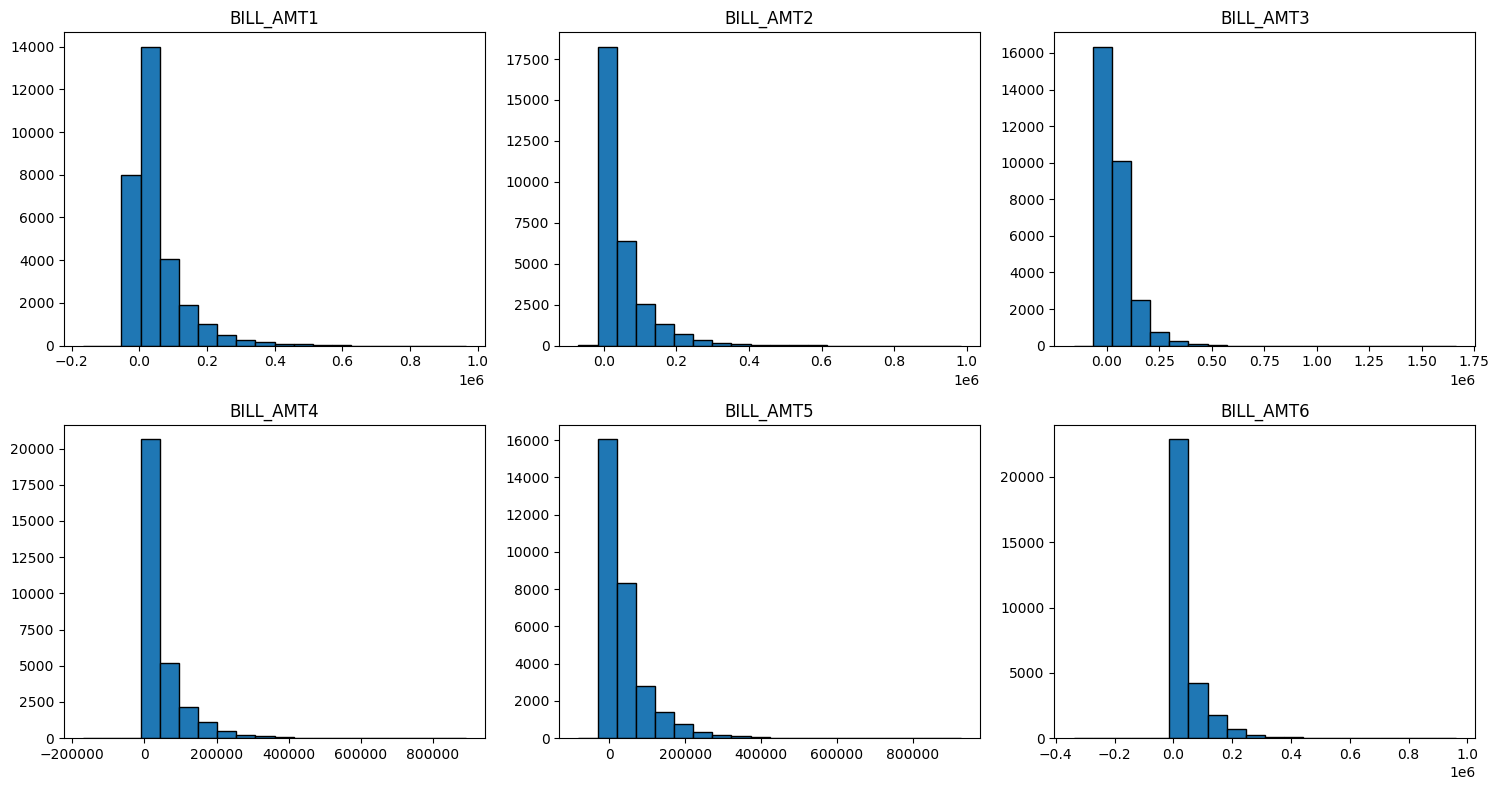

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

for i, coluna in enumerate(bill_features):
    plt.subplot(2, 3, i+1)
    plt.hist(df[coluna], bins=20, edgecolor='black')
    plt.title(coluna)

plt.tight_layout()
plt.show()


# Obtenha o resumo de .describe() para as características de valor do pagamento. Faz sentido?


In [28]:
df[pay_features].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267
std,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000
50%,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Muitas pessoas pagam pouco (mediana bem baixa).

Há valores máximos muito altos, o que pode indicar casos especiais ou outliers.

Mínimos em 0 são comuns — muitos clientes não pagaram nada no mês.



# Plote um histograma das características de pagamento da fatura como no exercício anterior, mas com rotação no eixo x.

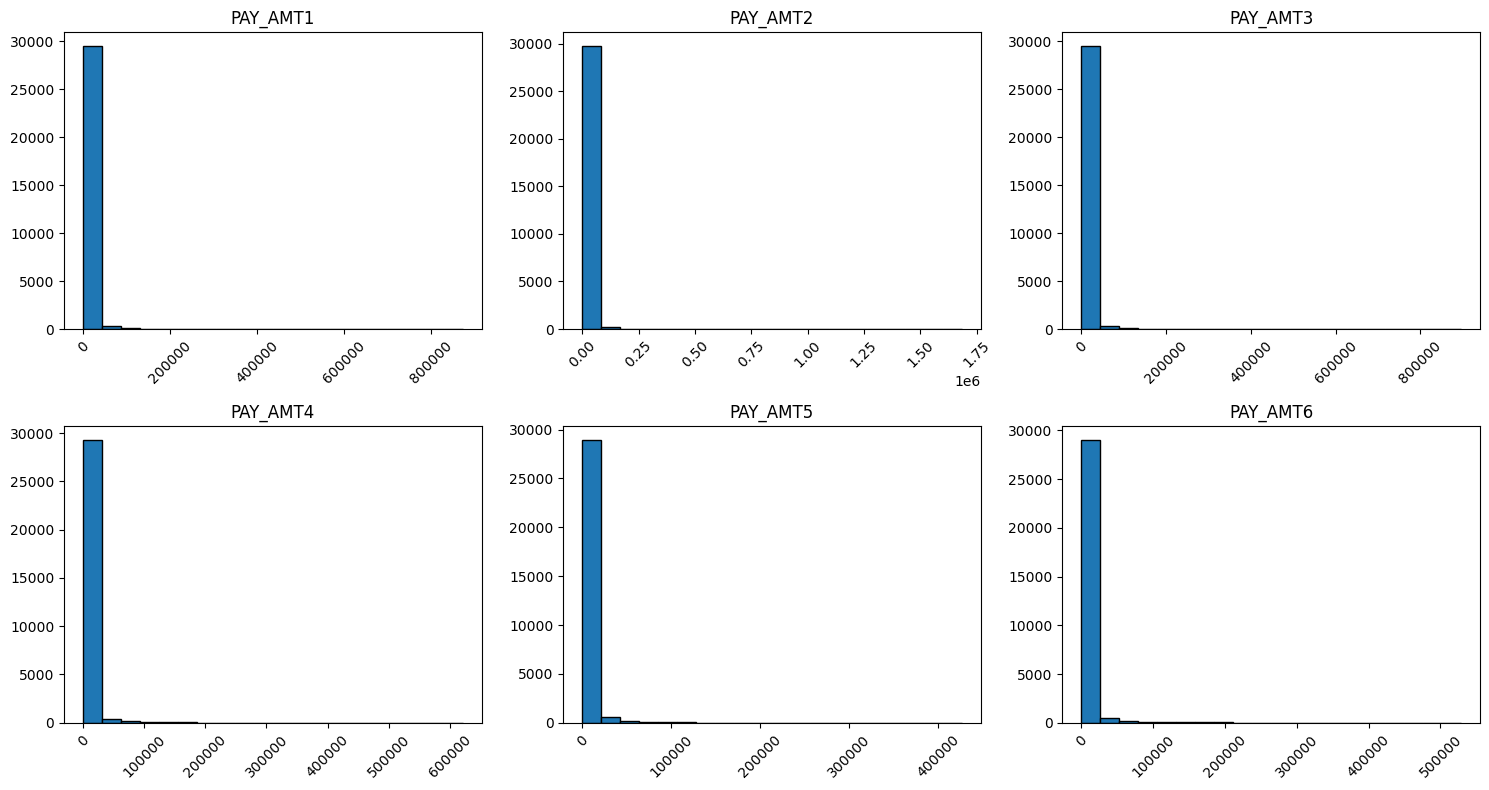

In [29]:
plt.figure(figsize=(15, 8))

for i, coluna in enumerate(pay_features):
    plt.subplot(2, 3, i+1)
    plt.hist(df[coluna], bins=20, edgecolor='black')
    plt.title(coluna)
    plt.xticks(rotation=45)  # ou xrot=45

plt.tight_layout()
plt.show()


# Use uma máscara booleana para ver quantos dos dados de valor do pagamento são exatamente iguais a 0.

In [32]:
(df[pay_features] == 0).sum()


PAY_AMT1    5504
PAY_AMT2    5663
PAY_AMT3    6223
PAY_AMT4    6660
PAY_AMT5    6955
PAY_AMT6    7416
dtype: int64

# Ignore os pagamentos iguais a 0 usando uma máscara e aplique np.log10() com .apply() para fazer histogramas.


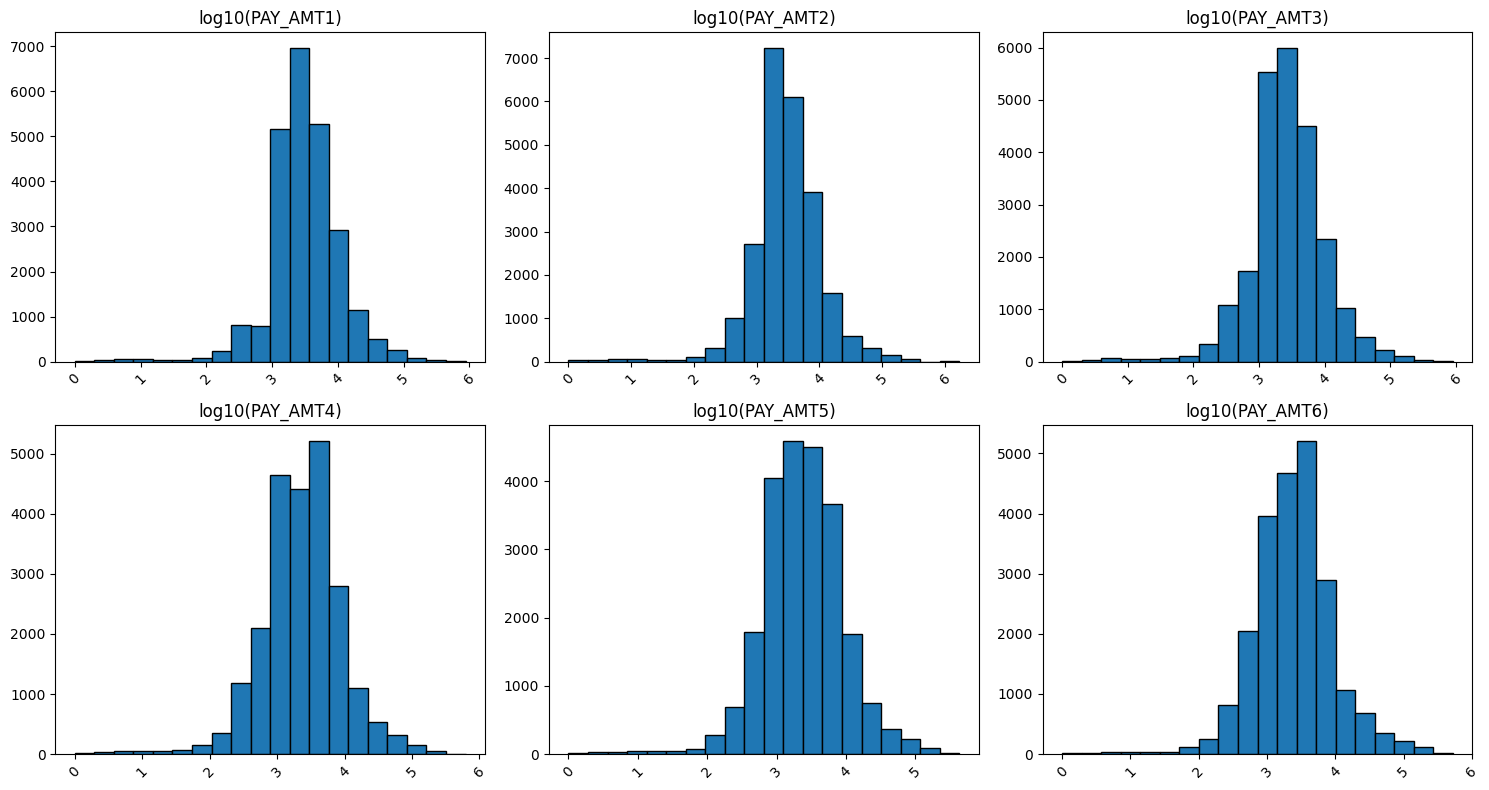

In [33]:
import numpy as np

# Mascara para remover valores iguais a 0
pagamentos_nao_zero = df[pay_features][df[pay_features] > 0]

# Aplica log10
log_pagamentos = pagamentos_nao_zero.apply(np.log10)

# Plotar
plt.figure(figsize=(15, 8))

for i, coluna in enumerate(pay_features):
    plt.subplot(2, 3, i+1)
    plt.hist(log_pagamentos[coluna].dropna(), bins=20, edgecolor='black')
    plt.title('log10(' + coluna + ')')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
